In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams

from statsmodels.tsa.stattools import adfuller
!pip install pmdarima --quiet
import pmdarima as pm

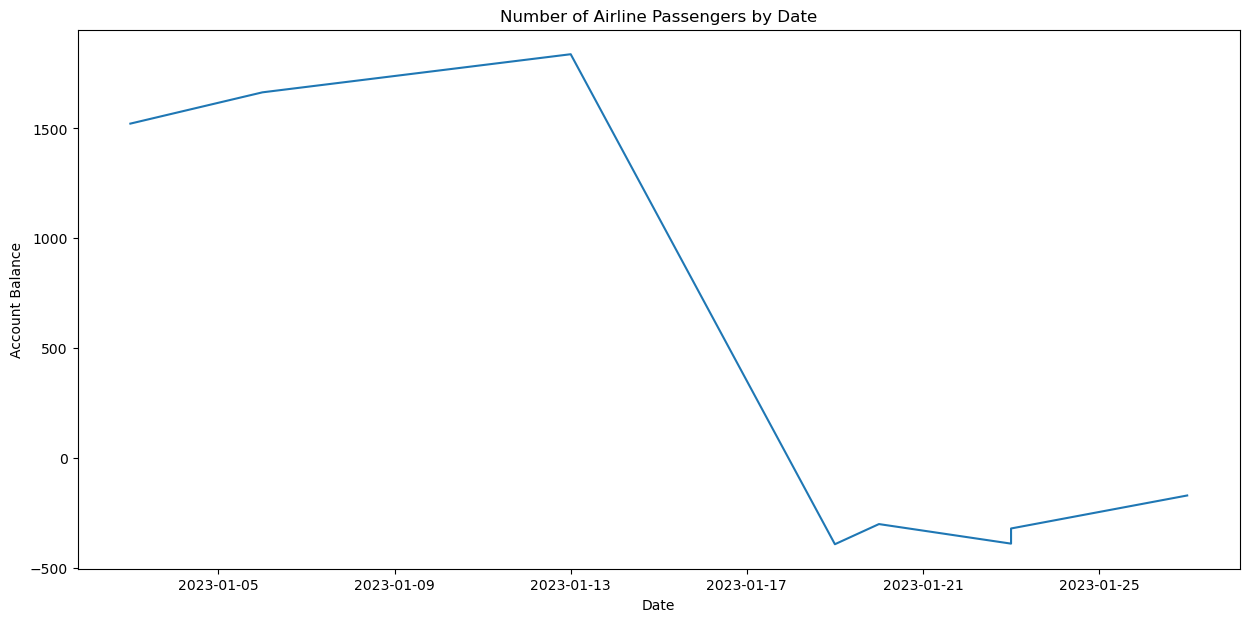

In [9]:
plt.figure(figsize=(15,7))
plt.title("Chequing Balance")
plt.xlabel('Date')
plt.ylabel('Account Balance')
plt.plot(chequing_transactions['Account Balance'])
plt.show()

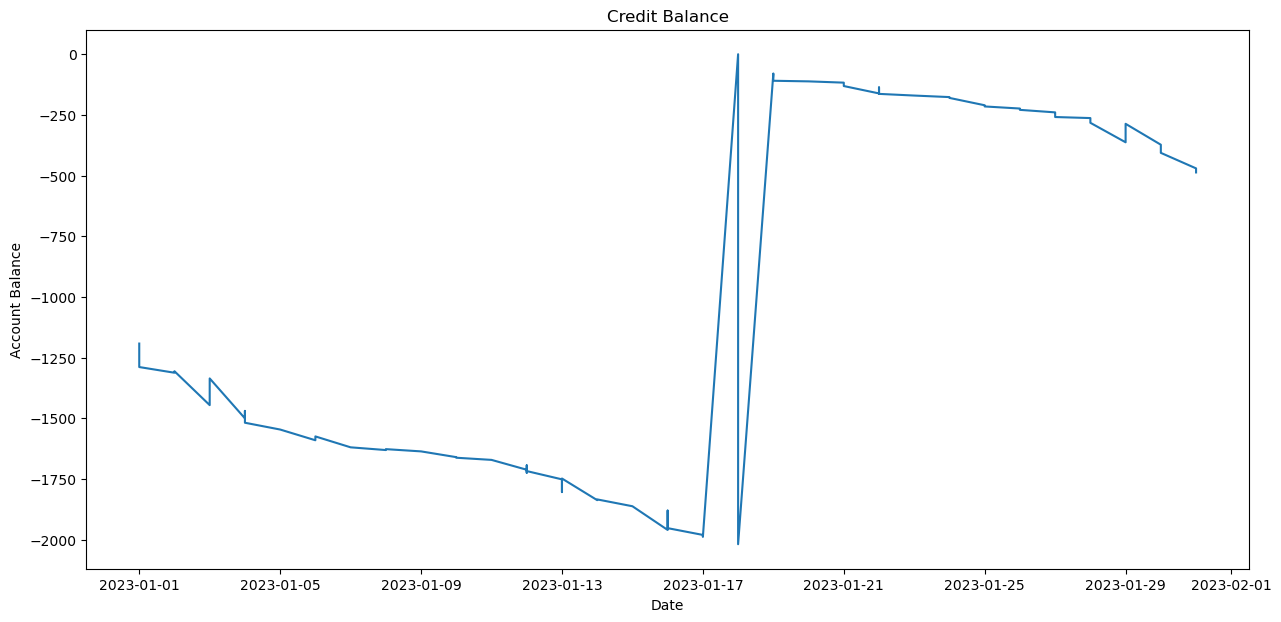

In [10]:
plt.figure(figsize=(15,7))
plt.title("Credit Balance")
plt.xlabel('Date')
plt.ylabel('Account Balance')
plt.plot(credit_transactions['Account Balance'])
plt.show()

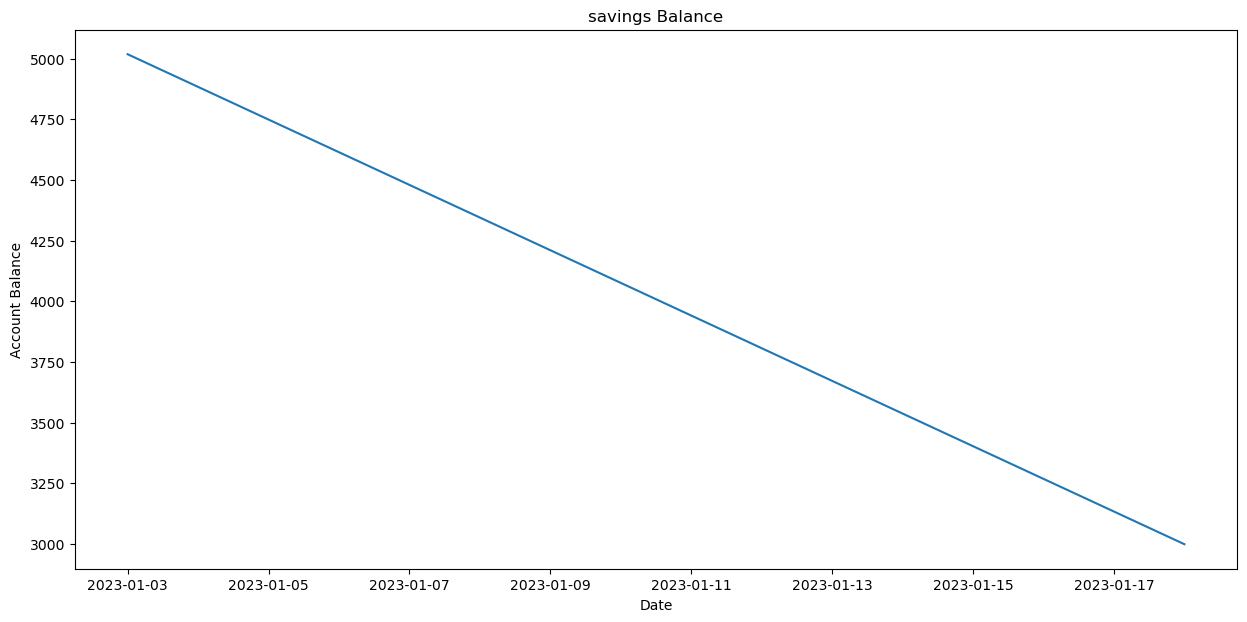

In [11]:
plt.figure(figsize=(15,7))
plt.title("savings Balance")
plt.xlabel('Date')
plt.ylabel('Account Balance')
plt.plot(savings_transactions['Account Balance'])
plt.show()

In [17]:
january = pd.read_csv('Data/transactions.csv')
january.drop(columns='Unnamed: 0', inplace=True)
february = pd.read_csv('Data/feb_transactions.csv')
february.drop(columns='Unnamed: 0', inplace=True)

In [18]:
january['Date'] = pd.to_datetime(january['Date'])
february['Date'] = pd.to_datetime(february['Date'])

In [22]:
two_months = [january, february]
two_months_df = pd.concat(two_months)

In [23]:
two_months_df.sort_values(by=['Date'], inplace=True)
two_months_df = two_months_df.reset_index(drop=True)

In [24]:
two_months_df

,Date,Head Category,Category,Amount,Account,Account Balance
0,2023-01-01,Food & Drinks,Drinks,-61.87,2,-1192.01
1,2023-01-01,Food & Drinks,Take-out,-59.83,2,-1251.84
2,2023-01-01,Food & Drinks,Restaurant,-19.68,2,-1271.52
3,2023-01-01,Lifestyle,Pharmacy,-17.24,2,-1288.76
4,2023-01-02,Food & Drinks,Coffee,-6.22,2,-1312.23
...,...,...,...,...,...,...
180,2023-02-27,Food & Drinks,Dine-out,-30.38,2,-705.44
181,2023-02-27,Food & Drinks,Dine-out,-34.93,2,-740.37
182,2023-02-27,Food & Drinks,Dine-out,-24.06,2,-764.43
183,2023-02-27,Food & Drinks,Coffee,-4.93,2,-769.36


In [25]:
two_months_df = two_months_df.set_index('Date')

In [30]:
chequing_transactions = two_months_df[two_months_df['Account'] == 1]
credit_transactions = two_months_df[two_months_df['Account'] == 2]
savings_transactions = two_months_df[two_months_df['Account'] == 3]

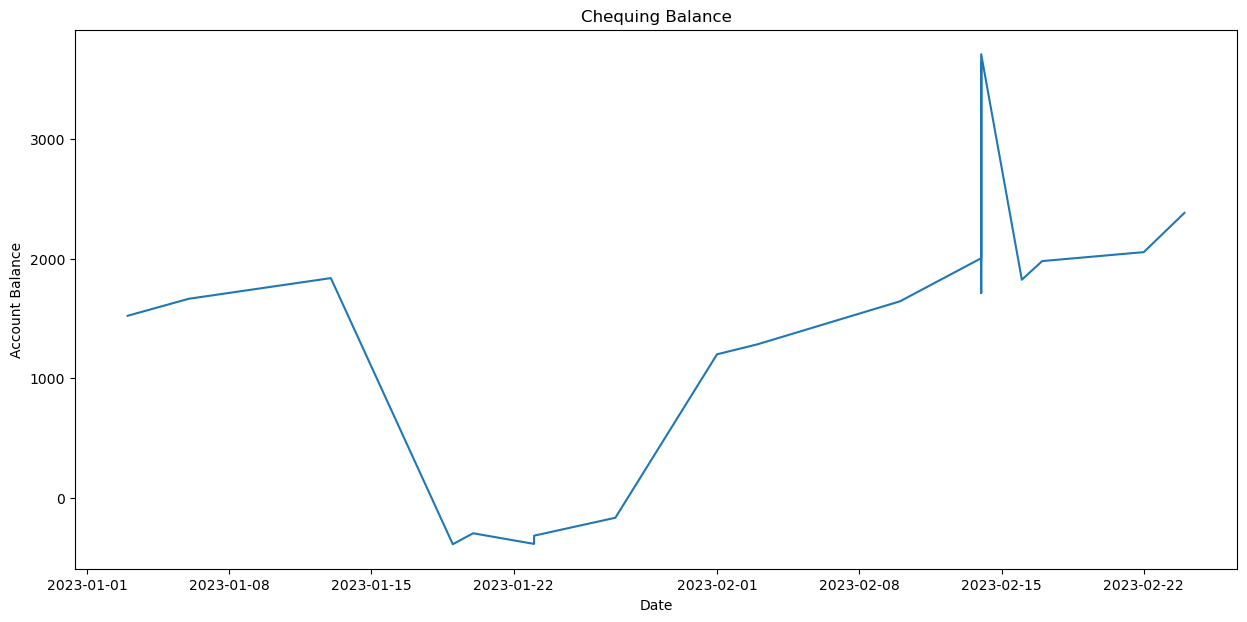

In [31]:
plt.figure(figsize=(15,7))
plt.title("Chequing Balance")
plt.xlabel('Date')
plt.ylabel('Account Balance')
plt.plot(chequing_transactions['Account Balance'])
plt.show()

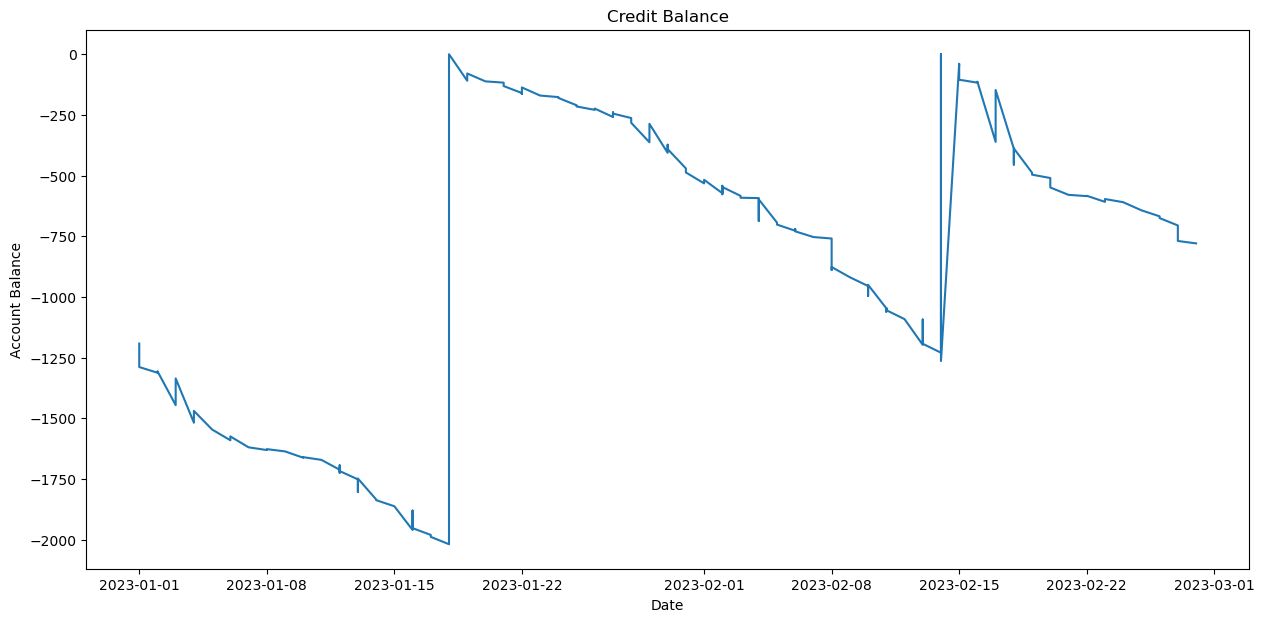

In [32]:
plt.figure(figsize=(15,7))
plt.title("Credit Balance")
plt.xlabel('Date')
plt.ylabel('Account Balance')
plt.plot(credit_transactions['Account Balance'])
plt.show()

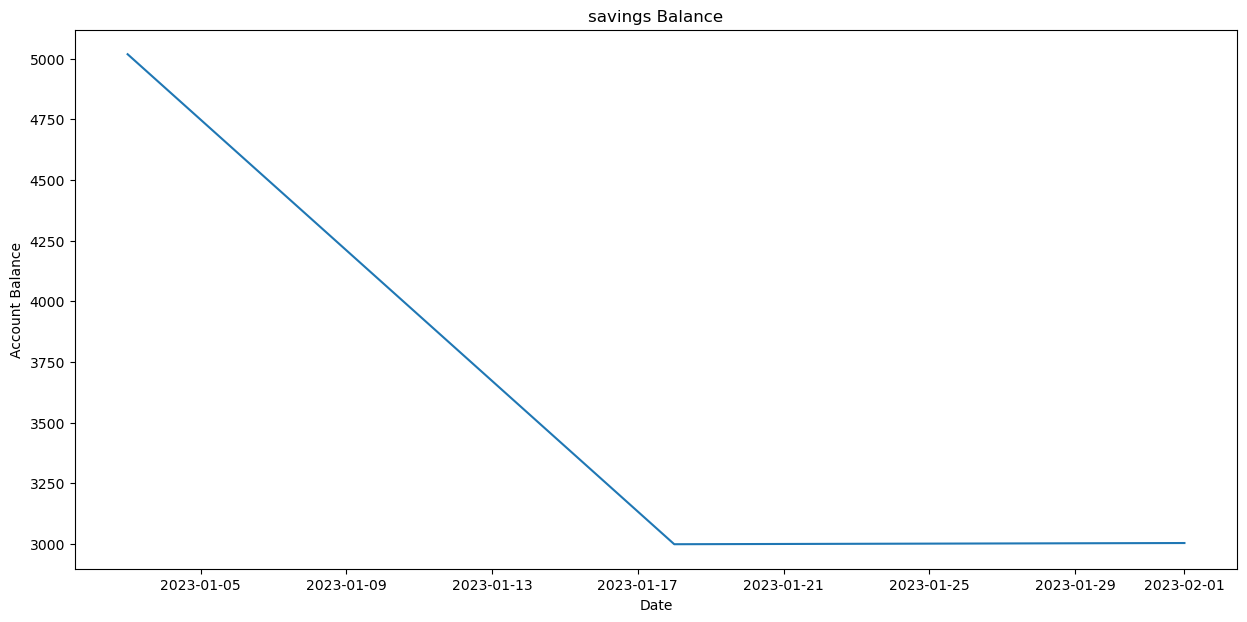

In [33]:
plt.figure(figsize=(15,7))
plt.title("savings Balance")
plt.xlabel('Date')
plt.ylabel('Account Balance')
plt.plot(savings_transactions['Account Balance'])
plt.show()

In [34]:
two_months_df.to_csv('Data/jan_feb_allaccounts.csv')

In [35]:
all_accounts = pd.read_csv('Data/jan_feb_allaccounts.csv')

In [37]:
all_accounts['Date'] = pd.to_datetime(all_accounts['Date'])

all_accounts.sort_values(by=['Date'], inplace=True)
all_accounts = all_accounts.reset_index(drop=True)

In [39]:
all_accounts = all_accounts.set_index('Date')

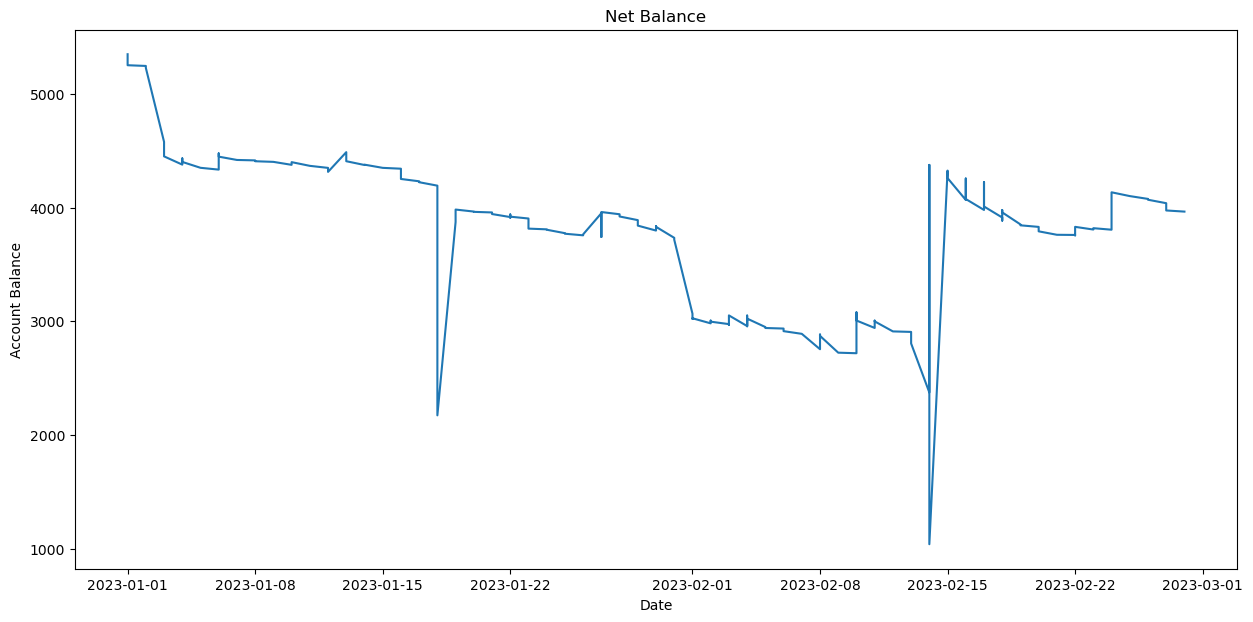

In [41]:
plt.figure(figsize=(15,7))
plt.title("Net Balance")
plt.xlabel('Date')
plt.ylabel('Account Balance')
plt.plot(all_accounts['Total Money'])
plt.show()

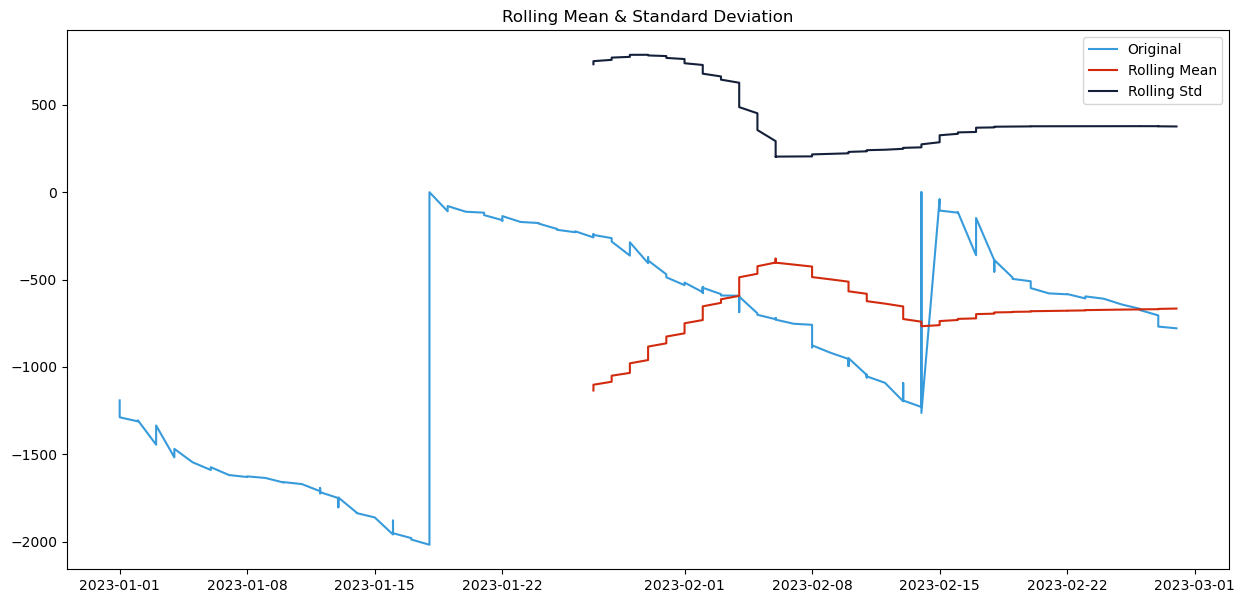

In [42]:
#Determine rolling statistics
credit_transactions["rolling_avg"] = credit_transactions["Account Balance"].rolling(window=100).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
credit_transactions["rolling_std"] = credit_transactions["Account Balance"].rolling(window=100).std()

#Plot rolling statistics
plt.figure(figsize=(15,7))
plt.plot(credit_transactions["Account Balance"], color='#379BDB', label='Original')
plt.plot(credit_transactions["rolling_avg"], color='#D22A0D', label='Rolling Mean')
plt.plot(credit_transactions["rolling_std"], color='#142039', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

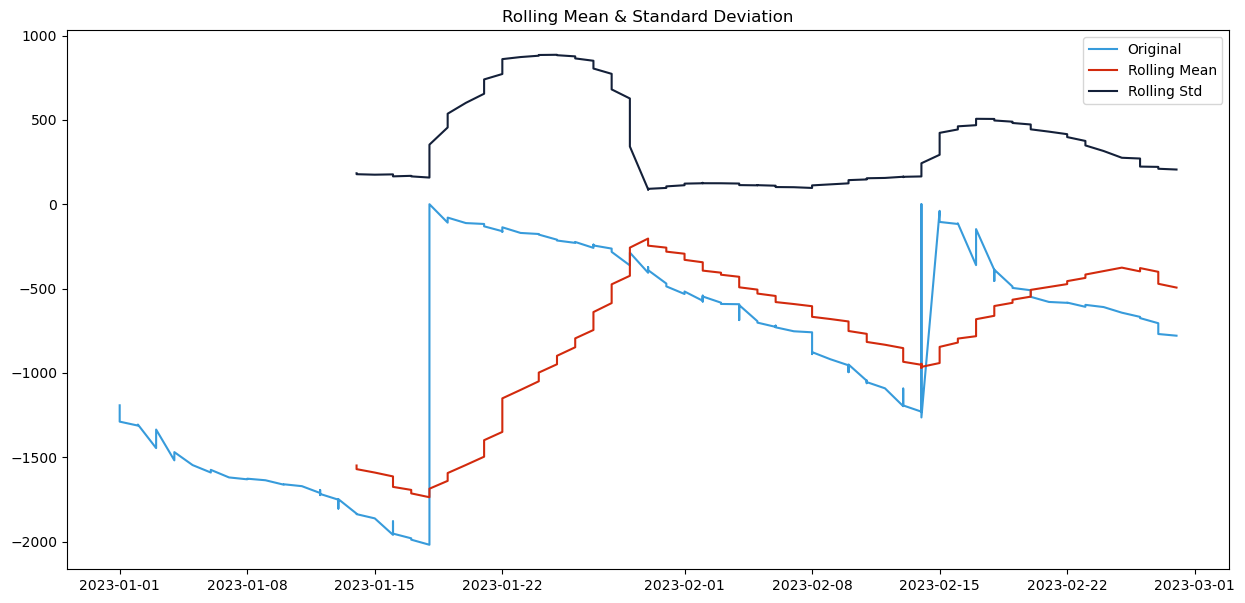

In [46]:
#Determine rolling statistics
credit_transactions["rolling_avg"] = credit_transactions["Account Balance"].rolling(window=30).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
credit_transactions["rolling_std"] = credit_transactions["Account Balance"].rolling(window=30).std()

#Plot rolling statistics
plt.figure(figsize=(15,7))
plt.plot(credit_transactions["Account Balance"], color='#379BDB', label='Original')
plt.plot(credit_transactions["rolling_avg"], color='#D22A0D', label='Rolling Mean')
plt.plot(credit_transactions["rolling_std"], color='#142039', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [44]:
credit_transactions.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 163 entries, 2023-01-01 to 2023-02-28
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Head Category    163 non-null    object 
 1   Category         163 non-null    object 
 2   Amount           163 non-null    float64
 3   Account          163 non-null    int64  
 4   Account Balance  163 non-null    float64
 5   rolling_avg      64 non-null     float64
 6   rolling_std      64 non-null     float64
dtypes: float64(4), int64(1), object(2)
memory usage: 10.2+ KB


In [47]:
#Augmented Dickey–Fuller test:
print('Results of Dickey Fuller Test:')
dftest = adfuller(credit_transactions['Account Balance'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                  -1.917564
p-value                          0.323844
#Lags Used                       1.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64
